# Пороговая фильтрация изображения

In [1]:
import sys
%matplotlib inline
import matplotlib.pyplot as plt
import cv2 as cv
import numpy as np

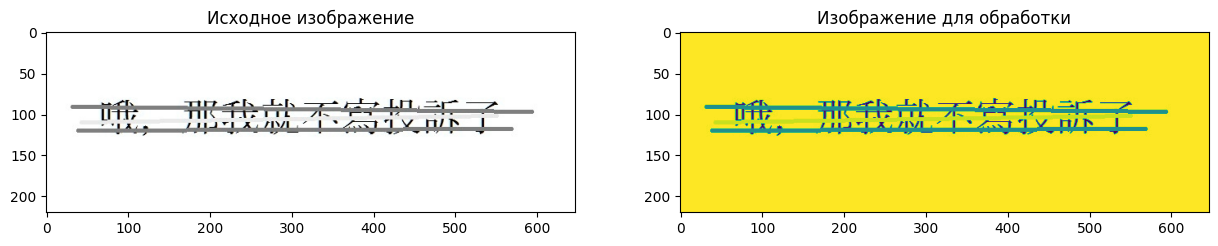

In [2]:
image1 = cv.imread('text.jpg')
gray_image1 = cv.cvtColor(image1, cv.COLOR_BGR2GRAY)

gs = plt.GridSpec(1, 2)
plt.figure(figsize=(15, 7))

plt.subplot(gs[0])
plt.imshow(image1)
plt.title('Исходное изображение')
plt.subplot(gs[1])
plt.imshow(gray_image1)
plt.title('Изображение для обработки')
plt.show()

## Выделение границ. Операторы Робертса и Собеля

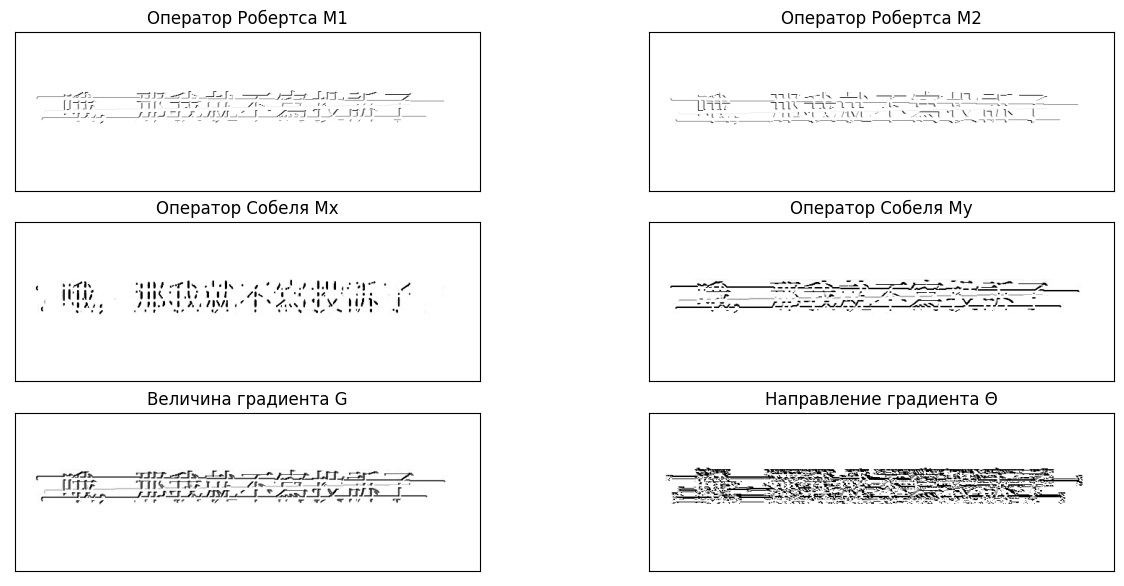

In [3]:
# Опреатор Робертса
M1 = np.asarray([[1, 0], [0, -1]])
M2 = np.asarray([[0, -1], [1, 0]])

# Опреатор Собеля
Mx = np.asarray([[1, 0, -1], [2, 0, -2], [1, 0, -1]])
My = np.asarray([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])

kernels = [M1, M2, Mx, My]

gs = plt.GridSpec(3, 2)
plt.figure(figsize=(15, 7))

titles = ['Оператор Робертcа M1', 'Оператор Робертcа M2', 'Оператор Собеля Mх',
          'Оператор Собеля My', 'Величина градиента G', 'Направление градиента Θ']
numberOfImage = 6
shape = gray_image1.shape
filtered_images = np.empty(shape[0] * shape[1] * numberOfImage).reshape(shape[0], shape[1], numberOfImage)

for i in np.arange(numberOfImage - 2):
    filtered_images[..., i] = cv.filter2D(gray_image1, -1, kernels[i])

filtered_images[..., 4] = np.sqrt(filtered_images[..., 2] ** 2 + filtered_images[..., 3] ** 2)
filtered_images[..., 5] = np.arctan2(filtered_images[..., 3], filtered_images[..., 2])

for i in np.arange(numberOfImage):
    plt.subplot(gs[i])
    plt.xticks([]), plt.yticks([])
    plt.title(titles[i])
    plt.imshow(filtered_images[..., i], cmap='binary')

plt.show()

Свертка изображения оператором Собеля с ядром $M_x$ является наиболее предпочтительным вариантом.
Сохраняем данное изображение

In [4]:
cv.imwrite('text_sobels_operator.jpeg', filtered_images[..., 2])

True

Чтение сохраненного изображения и инвертация цветов

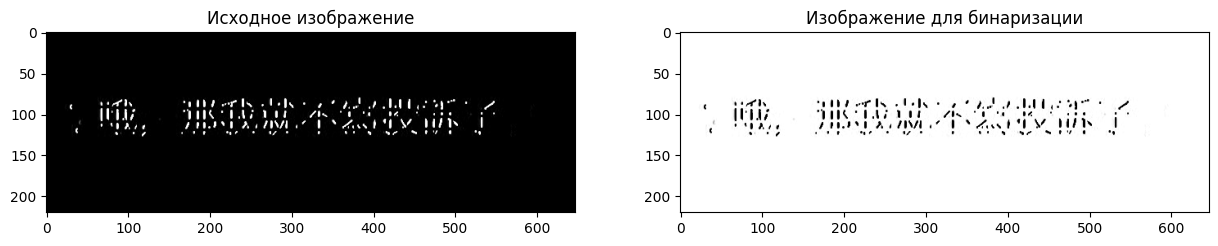

In [5]:
image1 = cv.imread('text_sobels_operator.jpeg')
gray_image1 = cv.cvtColor(image1, cv.COLOR_BGR2GRAY)
lut = lambda i: 255 - i
invert_image = lut(gray_image1)

gs = plt.GridSpec(1, 2)
plt.figure(figsize=(15, 7))

plt.subplot(gs[0])
plt.imshow(image1)
plt.title('Исходное изображение')
plt.subplot(gs[1])
plt.imshow(invert_image, cmap='gray')
plt.title('Изображение для бинаризации')
plt.show()

Сохраняем инвертрованное изображение

In [6]:
cv.imwrite('text_sobels_operator_inv.jpeg', invert_image)

True

## Бинаризация полутоновых изображений (пороговая фильтрация).

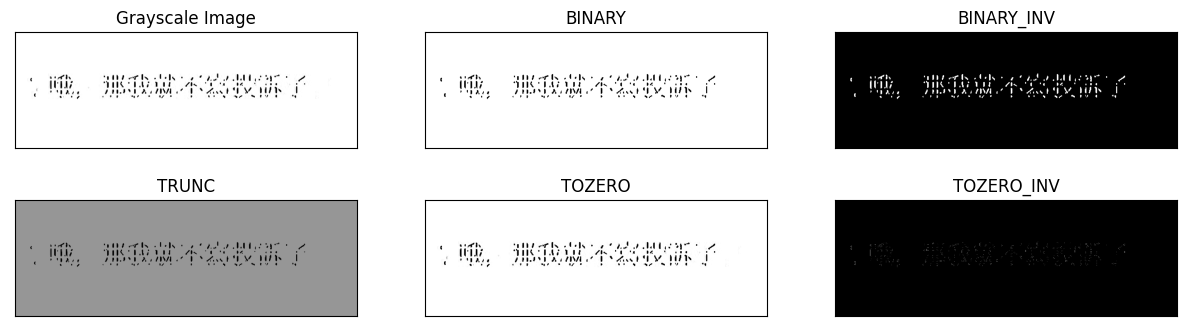

In [7]:
image = invert_image
threshold = 150

ret, thresh1 = cv.threshold(image, threshold, 255, cv.THRESH_BINARY)
ret, thresh2 = cv.threshold(image, threshold, 255, cv.THRESH_BINARY_INV)
ret, thresh3 = cv.threshold(image, threshold, 255, cv.THRESH_TRUNC)
ret, thresh4 = cv.threshold(image, threshold, 255, cv.THRESH_TOZERO)
ret, thresh5 = cv.threshold(image, threshold, 255, cv.THRESH_TOZERO_INV)
titles = ['Grayscale Image', 'BINARY', 'BINARY_INV', 'TRUNC', 'TOZERO', 'TOZERO_INV']
images = [image, thresh1, thresh2, thresh3, thresh4, thresh5]
gs = plt.GridSpec(3, 2)
plt.figure(figsize=(15, 4))
for i in np.arange(len(images)):
    plt.subplot(2, 3, i + 1)
    plt.imshow(images[i], 'gray', vmin=0, vmax=255)
    plt.title(titles[i])
    plt.xticks([])
    plt.yticks([])
plt.show()

Для перевода было выбрано изображение, получившееся в результате использования порогового значения cv.THRESH_BINARY_INV

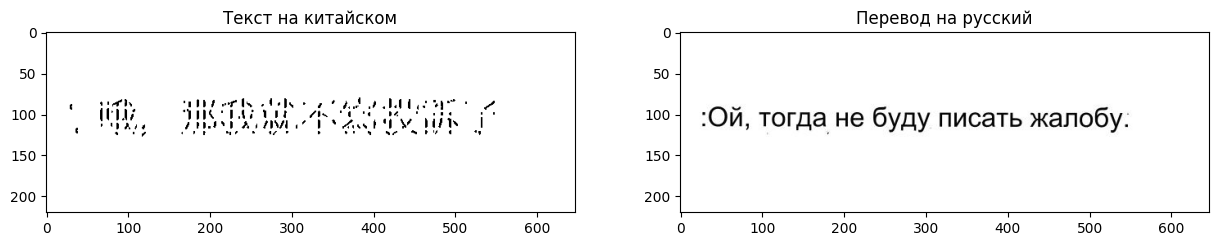

In [8]:
result_binary = cv.imread('BINARY_result.jpg')

gs = plt.GridSpec(1, 2)
plt.figure(figsize=(15, 7))

plt.subplot(gs[0, 0])
plt.imshow(thresh1, cmap='gray')
plt.title('Текст на китайском')
plt.subplot(gs[0, 1])
plt.imshow(result_binary, cmap='gray')
plt.title('Перевод на русский')
plt.show()